0.9713467048710601


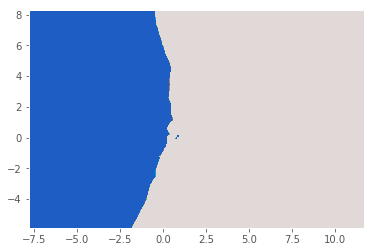

In [31]:
#This code was built as part of Introduction to Data Science and Analytics course taught by Anna Simkin & https://gist.github.com/Mashimo/3b412bd629d17a79a6dd5c44330508cd
def plotDecisionBoundary(model, X, y):
    fig = plt.figure()
    ax = fig.add_subplot(111)

    padding = 0.6
    resolution = 0.025
    colors = ['blue','red']

  # Calculate the boundaris
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    x_range = x_max - x_min
    y_range = y_max - y_min
    x_min -= x_range * padding
    y_min -= y_range * padding
    x_max += x_range * padding
    y_max += y_range * padding

  # Create a 2D Grid Matrix. The values stored in the matrix
  # are the predictions of the class at at said location
    xx, yy = np.meshgrid(np.arange(x_min, x_max, resolution),
                       np.arange(y_min, y_max, resolution))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

  # Plot the contour map
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.terrain)

##################################################
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot')
from matplotlib.colors import ListedColormap
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn import neighbors,datasets

X = pd.read_csv('breast-cancer-wisconsin.data', sep=',')

X.columns= ['sample', 'thickness', 'size', 'shape', 'adhesion', 'epithelial',
'nuclei', 'chromatin', 'nucleoli', 'mitoses', 'class'];

#print(X.dtypes)


# convert the object data to numeric, fill NAN with the mean values for nuclei
X.nuclei = pd.to_numeric(X.nuclei, errors='coerce')
X.nuclei = X.nuclei.fillna(X.nuclei.mean())

#separate the class label as a label y (2 for benign, 4 for malignant)
y = X['class']
#print(y.head())
#print(X.head(10))
X=X.drop(labels=['sample','class'],axis=1)
#split the train and test data sets
data = X;
labels = y;
data_train,data_test,label_train,label_test=train_test_split(data,labels,test_size=0.5, random_state=7)

#preprocessing scaling
TrainData = preprocessing.StandardScaler().fit_transform(data_train)
TestData=preprocessing.StandardScaler().fit_transform(data_test)

#Principal Component Analysis - dimensionality reduction algorithms
#The goal is to derive a set of degrees of freedom to capture most of the variability in our data

from sklearn.decomposition import PCA
pca = PCA(n_components=2) # 2 principal components 
pca.fit(TrainData)
X_train=pca.transform(TrainData)
X_test=pca.transform(TestData)

#training the model with the knn algorithm
y_train = label_train
from sklearn.neighbors import KNeighborsClassifier
n_neighbors=10
knn = KNeighborsClassifier(n_neighbors) 
knn.fit(X_train, y_train)

y_test=label_test
a=knn.score(X_test,y_test) #returns the mean accuracy on the test data
print(a)

plotDecisionBoundary(knn,X_test,y_test)
plt.show()
#blue = benign,red = malignant

